In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [32]:
tags = pd.read_csv('../wiki-corpus-v2/tag.csv', index_col=0)
tags = tags[tags.name != 'Constructive']
tags

,name
id,
1,Blanking
2,Nonsense
3,QualityIssue
5,FalseFact
6,Syntax
9,EditWar
11,Intention


In [33]:
corpus = pd.read_csv('../wiki-corpus-v2/revisiontag.csv', index_col=0)
corpus.head(5)

,revision_page_id,tag_id
revision_id,,
689015388,37831158,11
634787607,372646,5
713125917,35759328,1
256987527,1272844,12
419184617,23103900,12


In [34]:
tag_counts = corpus[corpus['tag_id'].isin(tags.index)]['tag_id'].value_counts()
pd.DataFrame(tag_counts)

,tag_id
11,731
2,459
1,449
5,446
3,257
6,135
9,74


In [35]:
def export(export_name):
    
    folder = 'export/tag_distribution'
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    filename = '%s-v2.pdf' % export_name
    
    path = os.path.join(folder, filename)
    plt.savefig(path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.clf()

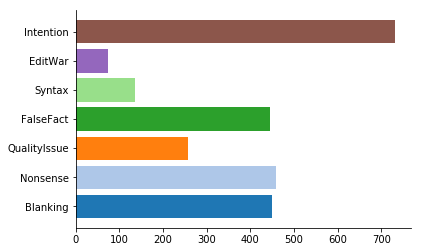

<Figure size 432x288 with 0 Axes>

In [36]:
def plot_hbar():
    bars = []
    colors = plt.get_cmap('tab20').colors
    for index, tag_id in enumerate(tags.index):
        bar = plt.barh(tags.loc[tag_id]['name'],
                       tag_counts[tag_id],
                      color=colors[tag_id - 1])
        bars.append(bar)
    sns.despine()
    export('tag-distribution-hbar')

plot_hbar()

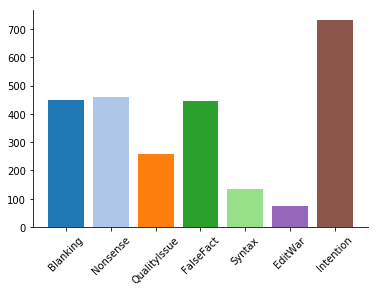

<Figure size 432x288 with 0 Axes>

In [37]:
def plot_vbar():
    bars = []
    colors = plt.get_cmap('tab20').colors
    for index, tag_id in enumerate(tags.index):
        bar = plt.bar(tags.loc[tag_id]['name'],
                      tag_counts[tag_id],
                      color=colors[tag_id - 1])
        bars.append(bar)
    plt.xticks(rotation=45)
    sns.despine()
    export('tag-distribution-vbar')

plot_vbar()